In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("airline_passengers.csv")
df.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
df.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
df.tail()

,Month,Thousands of Passengers
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0
144,International airline passengers: monthly tota...,NaN


In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [8]:
df["Month"] = pd.to_datetime(df["Month"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [10]:
df.head()

,Month,Thousands of Passengers
0,1949-01-01,112.0
1,1949-02-01,118.0
2,1949-03-01,132.0
3,1949-04-01,129.0
4,1949-05-01,121.0


In [11]:
df.set_index("Month",inplace=True)

In [12]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<AxesSubplot:xlabel='Month'>

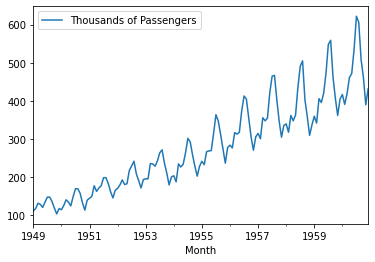

In [13]:
df.plot()

# We are performing ADFULLER test for stationarity

In [14]:
from statsmodels.tsa.stattools import adfuller

In [17]:
def adf_test(Series):
    result = adfuller(Series)
    print("ADF Statistics : {}".format(result[0]))
    print("P-value : {}".format(result[1]))
    if result[1] < 0.05 :
        print("Reject the null hyposthesis and the data has no unit root and is Stationary")
    else:
        print("Accept the null hypothesis and the data has a unit root and is not Stationary")        

In [18]:
adf_test(df["Thousands of Passengers"])

ADF Statistics : 0.8153688792060543
P-value : 0.9918802434376411
Accept the null hypothesis and the data has a unit root and is not Stationary


In [19]:
df["Passenger difference"] = df["Thousands of Passengers"] - df["Thousands of Passengers"].shift(1)

In [20]:
df.head()

,Thousands of Passengers,Passenger difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [22]:
adf_test(df["Passenger difference"].dropna())

ADF Statistics : -2.8292668241700034
P-value : 0.054213290283824954
Accept the null hypothesis and the data has a unit root and is not Stationary


In [25]:
df["Difference two"] = df["Passenger difference"] - df["Passenger difference"].shift(1)

In [26]:
df.head()

,Thousands of Passengers,Passenger difference,Difference two
Month,,,
1949-01-01,112.0,NaN,NaN
1949-02-01,118.0,6.0,NaN
1949-03-01,132.0,14.0,8.0
1949-04-01,129.0,-3.0,-17.0
1949-05-01,121.0,-8.0,-5.0


In [28]:
adf_test(df["Difference two"].dropna())

ADF Statistics : -16.384231542468488
P-value : 2.7328918500143186e-29
Reject the null hyposthesis and the data has no unit root and is Stationary


In [29]:
df["Passenger 12 difference"] = df["Thousands of Passengers"] - df["Thousands of Passengers"].shift(12)

In [30]:
df.head()

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN


In [31]:
adf_test(df["Passenger 12 difference"].dropna())

ADF Statistics : -3.3830207264924805
P-value : 0.011551493085514982
Reject the null hyposthesis and the data has no unit root and is Stationary


In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

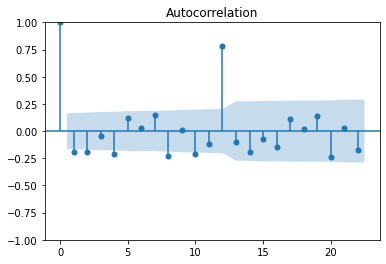

In [34]:
acf = plot_acf(df["Difference two"].dropna())

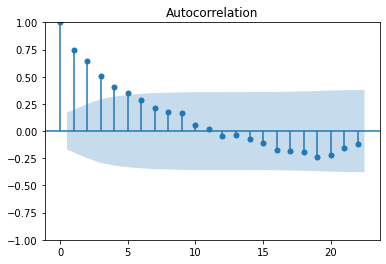

In [39]:
acf12 = plot_acf(df["Passenger 12 difference"].dropna())

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


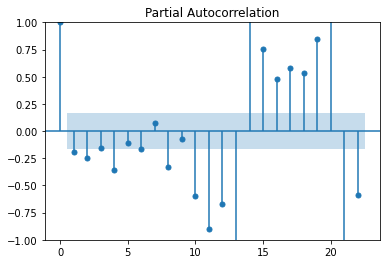

In [38]:
result = plot_pacf(df["Difference two"].dropna())

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


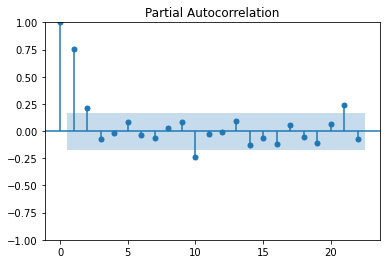

In [40]:
pacf12 = plot_pacf(df["Passenger 12 difference"].dropna())

In [41]:
df

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [42]:
from datetime import datetime,timedelta

In [43]:
train_end = datetime(1955,12,1)
test_end = datetime(1960,12,1)

In [45]:
train_data = df[:train_end]
test_data = df[train_end+timedelta(days =1):test_end]

In [46]:
pred_start_date = test_data.index[0]
pred_end_date =  test_data.index[-1]

In [47]:
test_data

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


In [52]:
from statsmodels.tsa.arima.model import ARIMA

In [53]:
train_data

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [79]:
from statsmodels.tsa.arima.model import ARIMA

In [98]:
model_arima = ARIMA(train_data["Thousands of Passengers"].iloc[2:],order = (10,2,12))

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [99]:
model_arima_fit = model_arima.fit()

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [100]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   82
Model:                    ARIMA(10, 2, 12)   Log Likelihood                -303.046
Date:                     Fri, 07 Oct 2022   AIC                            652.091
Time:                             19:03:17   BIC                            706.878
Sample:                         03-01-1949   HQIC                           674.057
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0970      0.075      1.285      0.199      -0.051       0.245
ar.L2         -1.1340      0.071    -15.952      0.000      -1.273      -0.995
ar.L3          0.2083      0.094      2.221      0.026       0.024       0.392
ar.L4         -1.1740      0.125     -9.371      0.000      -1.419      -0.928
ar.L5          0.2240      0.130      1.724      0.085      -0.031       0.479
ar.L6         -1.1261      0.163     -6.922      0.000      -1.445      -0.807
ar.L7          0.1241      0.140      0.884      0.377      -0.151       0.399
ar.L8         -1.0551      0.117     -8.999      0.000      -1.285      -0.825
ar.L9          0.0280      0.100      0.281      0.779      -0.167       0.223
ar.L10        -0.9378      0.074    -12.706      0.000      -1.082      -0.793
ma.L1         -1.3903      0.388     -3.583      0.000      -2.151      -0.630
ma.L2          1.5260      0.442      3.456      0.001       0.661       2.391
ma.L3         -1.9244      0.620     -3.105      0.002      -3.139      -0.709
ma.L4          2.1211      0.528      4.015      0.000       1.086       3.156
ma.L5         -2.2112      0.644     -3.433      0.001      -3.474      -0.949
ma.L6          2.2239      0.741      3.003      0.003       0.772       3.676
ma.L7         -2.1839      0.994     -2.197      0.028      -4.132      -0.236
ma.L8          1.8513      1.015      1.824      0.068      -0.138       3.840
ma.L9         -1.7113      1.016     -1.685      0.092      -3.702       0.280
ma.L10         1.2389      0.791      1.567      0.117      -0.311       2.789
ma.L11        -0.9364      0.531     -1.764      0.078      -1.977       0.104
ma.L12         0.4124      0.294      1.402      0.161      -0.164       0.989
sigma2        76.6148     32.358      2.368      0.018      13.194     140.035
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 3.76
Prob(Q):                              0.88   Prob(JB):                         0.15
Heteroskedasticity (H):               2.67   Skew:                             0.50
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [101]:
test_data

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference,Predicted_Arima
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,319.0
1956-02-01,277.0,-7.0,-13.0,44.0,360.0
1956-03-01,317.0,40.0,47.0,50.0,401.0
1956-04-01,313.0,-4.0,-44.0,44.0,442.0
1956-05-01,318.0,5.0,9.0,48.0,483.0
1956-06-01,374.0,56.0,51.0,59.0,524.0
1956-07-01,413.0,39.0,-17.0,49.0,565.0
1956-08-01,405.0,-8.0,-47.0,58.0,606.0
1956-09-01,355.0,-50.0,-42.0,43.0,647.0


In [102]:
print(pred_end_date)

1960-12-01 00:00:00


In [103]:
pred_start_date

Timestamp('1956-01-01 00:00:00')

In [104]:
pred = model_arima_fit.predict(start = pred_start_date,end = pred_end_date)
residuals = test_data["Thousands of Passengers"]-pred

In [105]:
pred

1956-01-01    280.621633
1956-02-01    271.297234
1956-03-01    287.837737
1956-04-01    300.491879
1956-05-01    298.749787
1956-06-01    345.768290
1956-07-01    390.136471
1956-08-01    375.732368
1956-09-01    342.521538
1956-10-01    297.612846
1956-11-01    274.393095
1956-12-01    298.597211
1957-01-01    309.143202
1957-02-01    296.269642
1957-03-01    309.954677
1957-04-01    326.162813
1957-05-01    329.083761
1957-06-01    374.039164
1957-07-01    417.929041
1957-08-01    400.484570
1957-09-01    365.806114
1957-10-01    326.776696
1957-11-01    304.167084
1957-12-01    327.319982
1958-01-01    337.478322
1958-02-01    320.994563
1958-03-01    332.500257
1958-04-01    352.207687
1958-05-01    359.361542
1958-06-01    402.322834
1958-07-01    444.901014
1958-08-01    425.506268
1958-09-01    389.338947
1958-10-01    355.965883
1958-11-01    334.509674
1958-12-01    355.448832
1959-01-01    365.478703
1959-02-01    345.733768
1959-03-01    355.314058
1959-04-01    378.700194


In [106]:
residuals

Month
1956-01-01      3.378367
1956-02-01      5.702766
1956-03-01     29.162263
1956-04-01     12.508121
1956-05-01     19.250213
1956-06-01     28.231710
1956-07-01     22.863529
1956-08-01     29.267632
1956-09-01     12.478462
1956-10-01      8.387154
1956-11-01     -3.393095
1956-12-01      7.402789
1957-01-01      5.856798
1957-02-01      4.730358
1957-03-01     46.045323
1957-04-01     21.837187
1957-05-01     25.916239
1957-06-01     47.960836
1957-07-01     47.070959
1957-08-01     66.515430
1957-09-01     38.193886
1957-10-01     20.223304
1957-11-01      0.832916
1957-12-01      8.680018
1958-01-01      2.521678
1958-02-01     -2.994563
1958-03-01     29.499743
1958-04-01     -4.207687
1958-05-01      3.638458
1958-06-01     32.677166
1958-07-01     46.098986
1958-08-01     79.493732
1958-09-01     14.661053
1958-10-01      3.034117
1958-11-01    -24.509674
1958-12-01    -18.448832
1959-01-01     -5.478703
1959-02-01     -3.733768
1959-03-01     50.685942
1959-04-01     17.2

<AxesSubplot:ylabel='Density'>

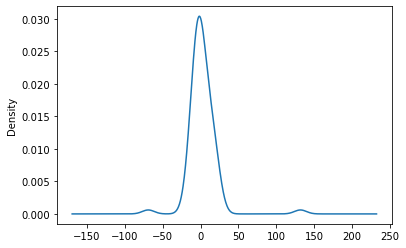

In [107]:
model_arima_fit.resid.plot(kind = "kde")

In [108]:
test_data["Predicted_Arima"] = pred

C:\Users\tamgi\AppData\Local\Temp\ipykernel_15868\2049347962.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["Predicted_Arima"] = pred


<AxesSubplot:xlabel='Month'>

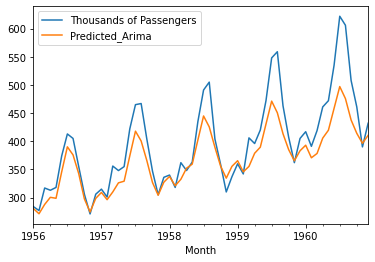

In [109]:
test_data[["Thousands of Passengers","Predicted_Arima"]].plot()

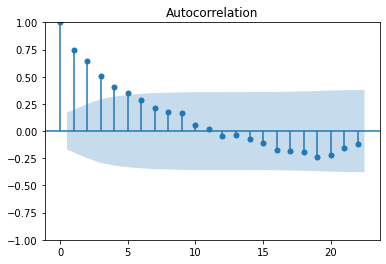

In [110]:
acf12 = plot_acf(df["Passenger 12 difference"].dropna())

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


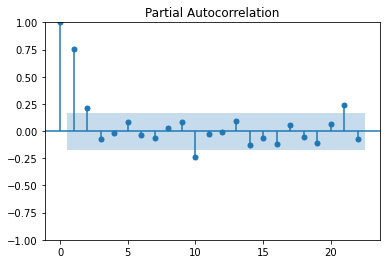

In [111]:
pacf12 = plot_pacf(df["Passenger 12 difference"].dropna())

In [112]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [113]:
model_Sarimax = SARIMAX(train_data["Thousands of Passengers"],order = (3,0,5),seasonal_order=(0,1,0,12))

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [114]:
model_Sarimax_fit = model_Sarimax.fit()

C:\Users\tamgi\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [115]:
model_Sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Fri, 07 Oct 2022   AIC                            548.481
Time:                                     19:08:55   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5984      0.937      0.638      0.523      -1.239       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4526      0.894     -0.507      0.613      -2.204       1.299
ma.L1          0.1837      1.164      0.158      0.875      -2.097       2.465
ma.L2         -0.5342      1.262     -0.423      0.672      -3.007       1.938
ma.L3         -0.0986      0.384     -0.257      0.797      -0.851       0.654
ma.L4         -0.1272      0.337     -0.377      0.706      -0.788       0.534
ma.L5          0.2471      0.357      0.693      0.488      -0.452       0.946
sigma2        87.7321     81.097      1.082      0.279     -71.214     246.679
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
test_data.tail()

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference,Predicted_Arima
Month,,,,,
1960-08-01,606.0,-16.0,-103.0,47.0,475.801655
1960-09-01,508.0,-98.0,-82.0,45.0,437.796127
1960-10-01,461.0,-47.0,51.0,54.0,414.125224
1960-11-01,390.0,-71.0,-24.0,28.0,396.358962
1960-12-01,432.0,42.0,113.0,27.0,410.529496


In [117]:
pred_sarima = model_Sarimax_fit.predict(start = pred_start_date,end = pred_end_date)
residuals = test_data["Thousands of Passengers"] -pred_sarima

<AxesSubplot:xlabel='Month'>

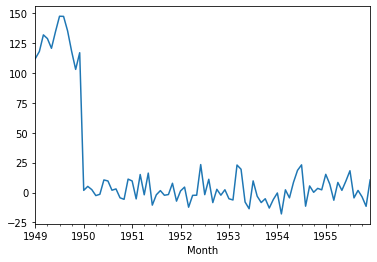

In [118]:
model_Sarimax_fit.resid.plot()

<AxesSubplot:ylabel='Density'>

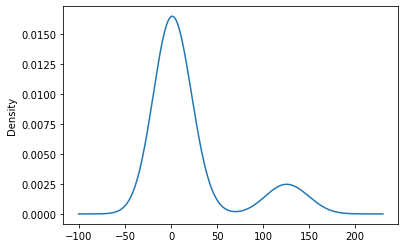

In [119]:
model_Sarimax_fit.resid.plot(kind = "kde")

In [120]:
test_data["predicted Sarimax"] = pred_sarima

C:\Users\tamgi\AppData\Local\Temp\ipykernel_15868\2163216216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data["predicted Sarimax"] = pred_sarima


In [121]:
test_data

,Thousands of Passengers,Passenger difference,Difference two,Passenger 12 difference,Predicted_Arima,predicted Sarimax
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,280.621633,286.184891
1956-02-01,277.0,-7.0,-13.0,44.0,271.297234,281.277419
1956-03-01,317.0,40.0,47.0,50.0,287.837737,309.916360
1956-04-01,313.0,-4.0,-44.0,44.0,300.491879,310.676242
1956-05-01,318.0,5.0,9.0,48.0,298.749787,311.334180
1956-06-01,374.0,56.0,51.0,59.0,345.768290,354.948702
1956-07-01,413.0,39.0,-17.0,49.0,390.136471,403.396598
1956-08-01,405.0,-8.0,-47.0,58.0,375.732368,385.069542
1956-09-01,355.0,-50.0,-42.0,43.0,342.521538,349.443618


<AxesSubplot:xlabel='Month'>

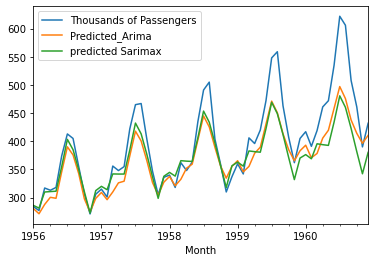

In [122]:
test_data[["Thousands of Passengers","Predicted_Arima","predicted Sarimax"]].plot()